In [ ]:
import numpy as np
import pandas as pd
import math
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
import plotly.graph_objects as go
from sklearn import preprocessing
preprocessing.LabelEncoder()
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from lightgbm import LGBMRegressor
from sklearn.model_selection import RandomizedSearchCV,GridSearchCV

In [ ]:
from sklearn.metrics import r2_score,mean_squared_error
from sklearn.preprocessing import LabelEncoder,StandardScaler

In [ ]:
df_train = pd.read_csv('/content/airbnb_listing_train.csv')
df_validate = pd.read_csv('/content/airbnb_listing_validate.csv')

df_ss=pd.read_csv('/content/sample_submission.csv')

In [ ]:
def aboutdf (df):
    count_null = df.isnull().sum()
    df_stats = pd.DataFrame(index = df.columns, data =
                           {'datatype': df.dtypes,
                            'unique_values': df.nunique(),
                            'have_null?': df.isnull().any(),
                            'Number of null values' : count_null,
                            'percentage of null values' : count_null/df.shape[0]*100 })
    return df_stats

In [ ]:
aboutdf(df_train)

,datatype,unique_values,have_null?,Number of null values,percentage of null values
id,int64,12901,False,0,0.000000
name,object,12653,True,22,0.170529
host_id,int64,11601,False,0,0.000000
host_name,object,4536,True,8,0.062011
neighbourhood_group,float64,0,True,12901,100.000000
neighbourhood,object,22,False,0,0.000000
latitude,float64,5227,False,0,0.000000
longitude,float64,7887,False,0,0.000000
room_type,object,4,False,0,0.000000
minimum_nights,int64,56,False,0,0.000000


In [ ]:
bool_series = pd.notnull(df_train["name"])
df_train[bool_series].name

0                      Luxury home 100m2+garden in center!
1                              East is where your home is!
2          Amsterdam Central - LUXURY house in BUSY STREET
3                               great appartment down town
4            Private room with canal view in peaceful area
                               ...                        
12896    Quiet stylish private room 15 mins to city  ce...
12897    Beautiful, spacious apt. with great views @ IJ...
12898                  Great apartment de Pijp/Albert Cuyp
12899             Stylish apartment in an amazing location
12900                     Amsterdam Apartments First Floor
Name: name, Length: 12879, dtype: object

In [ ]:
df_train.name.describe()

count         12879
unique        12653
top       Amsterdam
freq             28
Name: name, dtype: object

In [ ]:
df_train[bool_series].groupby(['name']).size().sort_values(ascending=False).reset_index(name='count').head(100)

,name,count
0,Amsterdam,28
1,Spacious apartment near Vondelpark,6
2,Lovely apartment in Amsterdam,5
3,Spacious apartment in Amsterdam,5
4,Cosy apartment in the city centre of Amsterdam,4
...,...,...
95,Home sweet home,2
96,Spacious private room in the heart of Amsterdam,2
97,Light appartment in Amsterdam,2
98,NEW! Temporary housing in the centre of Amsterdam,2


In [ ]:
d=df_train[bool_series].groupby(['name']).size().sort_values(ascending=False).reset_index(name='count').head(100)
fig=px.bar(d,
                           y='name',
                           x='count',
                           #size='count',
                           #color='name',
                           range_x=[0,30]
                           )
fig.update_layout(autosize=False,
                  height=500,
                  width=1400,
                  font=dict(size=15,color="#0f0f0f",family="Courier New, monospace"),
                 )
fig.show()

In [ ]:
df_train.host_name.describe()

count       12893
unique       4536
top       Martijn
freq           76
Name: host_name, dtype: object

In [ ]:
bool_series1 = pd.notnull(df_train["host_name"])
df_train[bool_series1].host_name

0        Marjolein
1              Ana
2             Mark
3            Ayden
4           Alissa
           ...    
12896     Michelle
12897         Rens
12898     Francien
12899         Olaf
12900         City
Name: host_name, Length: 12893, dtype: object

In [ ]:
df_train[bool_series1].groupby(['host_name']).size().sort_values(ascending=False).reset_index(name='count').head(100)

,host_name,count
0,Martijn,76
1,Anne,58
2,Thomas,53
3,Tim,51
4,Marieke,51
...,...,...
95,Sara,20
96,Steven,20
97,Floor,20
98,Dennis,20


In [ ]:
d=df_train[bool_series1].groupby(['host_name']).size().sort_values(ascending=False).reset_index(name='count').head(100)
fig=px.bar(d,
                           y='host_name',
                           x='count',
                           #size='count',
                           #color='name',
                           range_x=[0,80]
                           )
fig.update_layout(autosize=False,
                  height=500,
                  width=1400,
                  font=dict(size=15,color="#0f0f0f",family="Courier New, monospace"),
                 )
fig.show()

In [ ]:
df_train.neighbourhood.describe()

count                      12901
unique                        22
top       De Baarsjes - Oud-West
freq                        2209
Name: neighbourhood, dtype: object

In [ ]:
df_train.groupby(['neighbourhood']).size().sort_values(ascending=False).reset_index(name='count')

,neighbourhood,count
0,De Baarsjes - Oud-West,2209
1,De Pijp - Rivierenbuurt,1600
2,Centrum-West,1429
3,Centrum-Oost,1097
4,Westerpark,958
5,Zuid,924
6,Oud-Oost,831
7,Bos en Lommer,730
8,Oostelijk Havengebied - Indische Buurt,644
9,Watergraafsmeer,381


In [ ]:
d=df_train.groupby(['neighbourhood']).size().sort_values(ascending=False).reset_index(name='count')
fig=px.bar(d,
                           y='neighbourhood',
                           x='count',
                           #size='count',
                           #color='name',
                           range_x=[0,2500]
                           )
fig.update_layout(autosize=False,
                  height=500,
                  width=1400,
                  font=dict(size=15,color="#0f0f0f",family="Courier New, monospace"),
                 )
fig.show()

In [ ]:
df_train.room_type.unique

<bound method Series.unique of 0        Entire home/apt
1        Entire home/apt
2        Entire home/apt
3        Entire home/apt
4           Private room
              ...       
12896    Entire home/apt
12897    Entire home/apt
12898    Entire home/apt
12899    Entire home/apt
12900         Hotel room
Name: room_type, Length: 12901, dtype: object>

In [ ]:
d=df_train.groupby(['room_type']).size().sort_values(ascending=False).reset_index(name='count')
fig=px.bar(d,
                           y='room_type',
                           x='count',
                           #size='count',
                           #color='name',
                           #range_y=[0,5]
                           )
fig.update_layout(autosize=False,
                  height=500,
                  width=1400,
                  font=dict(size=15,color="#0f0f0f",family="Courier New, monospace"),
                 )
fig.show()

In [ ]:
df_train.minimum_nights.describe()

count    12901.000000
mean         3.542516
std         15.154077
min          1.000000
25%          2.000000
50%          2.000000
75%          3.000000
max       1001.000000
Name: minimum_nights, dtype: float64

In [ ]:
d=df_train.groupby(['minimum_nights']).size().sort_values(ascending=False).reset_index(name='count').head(100)
fig=px.scatter(d,
                           x='minimum_nights',
                           y='count',
                           size='minimum_nights',
                           color='minimum_nights',
                           range_x=[0,1005],
                           range_y=[0,80]
                           )
fig.update_layout(autosize=False,
                  height=500,
                  width=1400,
                  font=dict(size=15,color="#0f0f0f",family="Courier New, monospace"),
                 )
fig.show()

In [ ]:
df_train.number_of_reviews.describe()

count    12901.000000
mean        24.803194
std         53.406134
min          0.000000
25%          2.000000
50%          9.000000
75%         24.000000
max        843.000000
Name: number_of_reviews, dtype: float64

In [ ]:
df_train.groupby(['number_of_reviews']).size().sort_values(ascending=False).reset_index(name='count')

,number_of_reviews,count
0,0,1596
1,1,928
2,2,761
3,3,661
4,4,590
...,...,...
357,116,1
358,312,1
359,311,1
360,306,1


In [ ]:
d=df_train.groupby(['number_of_reviews']).size().sort_values(ascending=False).reset_index(name='count')
fig=px.scatter(d,
                           x='number_of_reviews',
                           y='count',
                           size='count',
                           color='number_of_reviews',
                           range_y=[0,1700],
                           range_x=[0,900]
                           )
fig.update_layout(autosize=False,
                  height=500,
                  width=1400,
                  font=dict(size=15,color="#0f0f0f",family="Courier New, monospace"),
                 )
fig.show()

In [ ]:
df_train.last_review.describe()

count          11305
unique          1495
top       08-03-2020
freq             269
Name: last_review, dtype: object

In [ ]:
df_train.last_review

0        15-02-2020
1        19-06-2019
2        16-03-2020
3        17-02-2020
4        26-02-2020
            ...    
12896    13-09-2017
12897    25-02-2020
12898    07-10-2018
12899    28-04-2019
12900    17-02-2020
Name: last_review, Length: 12901, dtype: object

In [ ]:
d=df_train.groupby(['last_review']).size().sort_values(ascending=False).reset_index(name='count').head(100)
fig=px.scatter(d,
                           x='last_review',
                           y='count',
                           size='count',
                           color='last_review',
                           range_y=[0,300],
                           #range_x=[0,900]
                           )
fig.update_layout(autosize=False,
                  height=500,
                  width=1400,
                  font=dict(size=15,color="#0f0f0f",family="Courier New, monospace"),
                 )
fig.show()

In [ ]:
df_train.reviews_per_month.describe()

count    11305.000000
mean         0.748501
std          1.260791
min          0.010000
25%          0.180000
50%          0.380000
75%          0.770000
max         50.000000
Name: reviews_per_month, dtype: float64

In [ ]:
df_train.calculated_host_listings_count.describe()

count    12901.000000
mean         2.136501
std          6.001838
min          1.000000
25%          1.000000
50%          1.000000
75%          1.000000
max         78.000000
Name: calculated_host_listings_count, dtype: float64

In [ ]:
df_train.availability_365.describe()

count    12901.000000
mean        61.392295
std        107.988329
min          0.000000
25%          0.000000
50%          0.000000
75%         87.000000
max        365.000000
Name: availability_365, dtype: float64

In [ ]:
d=df_train.groupby(['availability_365']).size().sort_values(ascending=False).reset_index(name='count')
fig=px.scatter(d,
                           x='availability_365',
                           y='count',
                           size='availability_365',
                           color='availability_365',
                           range_y=[0,200],
                           #range_x=[0,900]
                           )
fig.update_layout(autosize=False,
                  height=500,
                  width=1400,
                  font=dict(size=15,color="#0f0f0f",family="Courier New, monospace"),
                 )
fig.show()

In [ ]:
df_train.price.describe()

count    12901.000000
mean       166.959538
std        234.794630
min          6.000000
25%         99.000000
50%        135.000000
75%        190.000000
max       9000.000000
Name: price, dtype: float64

In [ ]:
df_train[['name','host_name','price']].sort_values(by='price',ascending=False)

,name,host_name,price
12839,"Center, Large&Sunny Room,Pvt Bathrm",David,9000
6023,Moie kamer in Amsterdam,Mery,7550
10029,"Hotel Estheréa, Classic Room",Hotel Estheréa,7000
12885,"Hotel Estheréa, Deluxe Room",Hotel Estheréa,7000
1657,"Hotel Estheréa, Triple Room",Hotel Estheréa,7000
...,...,...,...
5427,1 Bed in 10 Bedded Girls Dorm En-suite,ClinkNOORD,20
7810,Minimalist White Room,Daniela,19
480,Appartement in het veelzijdige Amsterdam-Noord,Han,12
1887,Beautiful calm room in Amsterdam,Herry,10


In [ ]:
d=df_train[['name','host_name','price']].sort_values(by='price',ascending=False).head(50)
fig=px.scatter(d,
                           x='name',
                           y='price',
                           size='price',
                           color='host_name',
                           #range_y=[0,200],
                           #range_x=[0,900]
                           )
fig.update_layout(autosize=False,
                  height=500,
                  width=1400,
                  font=dict(size=15,color="#0f0f0f",family="Courier New, monospace"),
                 )
fig.show()

<ipython-input-37-52f75420237e>:2: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



<Axes: >

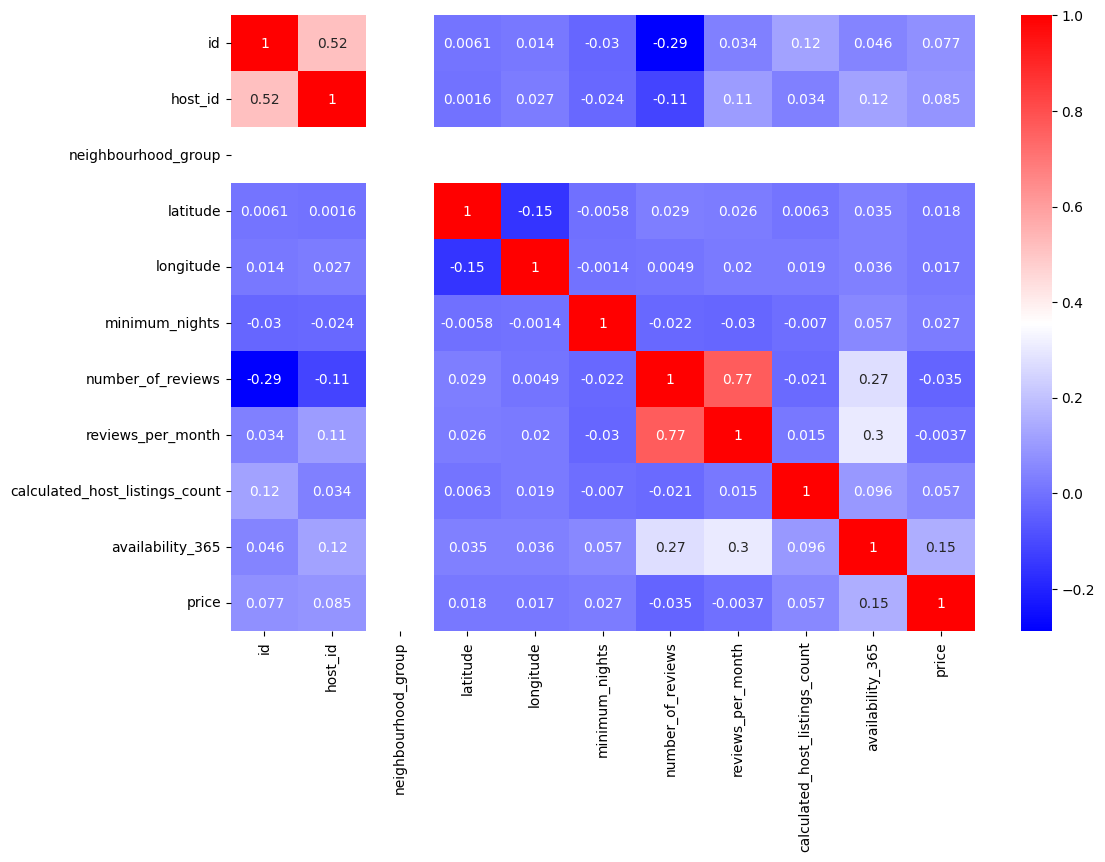

In [ ]:
plt.figure(figsize=(12,8))
sns.heatmap(df_train.corr(),cmap='bwr',annot=True)

Data Cleaning

In [ ]:
df_train.cp=df_train.copy()

<ipython-input-38-1a4a81c0b08a>:1: UserWarning:

Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access



In [ ]:
df_train_dup=df_train[df_train.duplicated()]
df_train_dup.shape

(0, 16)

In [ ]:
df_train['last_review'].mode()

0    08-03-2020
Name: last_review, dtype: object

In [ ]:
df_train['last_review'].describe()

count          11305
unique          1495
top       08-03-2020
freq             269
Name: last_review, dtype: object

In [ ]:
df_train['reviews_per_month'].describe()

count    11305.000000
mean         0.748501
std          1.260791
min          0.010000
25%          0.180000
50%          0.380000
75%          0.770000
max         50.000000
Name: reviews_per_month, dtype: float64

In [ ]:
df_train['reviews_per_month'].describe()

count    11305.000000
mean         0.748501
std          1.260791
min          0.010000
25%          0.180000
50%          0.380000
75%          0.770000
max         50.000000
Name: reviews_per_month, dtype: float64

In [ ]:
df_train['last_review']=pd.to_datetime(df_train['last_review'])

<ipython-input-44-db40ab2080e0>:1: UserWarning:

Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.



In [ ]:
df_train['name'].fillna(df_train['name'].mode()[0], inplace=True)
df_train['host_name'].fillna(df_train['host_name'].mode()[0],inplace=True)
df_train['last_review'].fillna(df_train['last_review'].mean(),inplace=True)
df_train['reviews_per_month'].fillna(df_train['reviews_per_month'].mean(),inplace=True)

Dealing with the last_review datatime columns.split it into year,month,day

In [ ]:
df_train["day"] = df_train['last_review'].map(lambda x: x.day)
df_train["month"] = df_train['last_review'].map(lambda x: x.month)
df_train["year"] = df_train['last_review'].map(lambda x: x.year)

In [ ]:
aboutdf(df_train)

,datatype,unique_values,have_null?,Number of null values,percentage of null values
id,int64,12901,False,0,0.0
name,object,12653,False,0,0.0
host_id,int64,11601,False,0,0.0
host_name,object,4536,False,0,0.0
neighbourhood_group,float64,0,True,12901,100.0
neighbourhood,object,22,False,0,0.0
latitude,float64,5227,False,0,0.0
longitude,float64,7887,False,0,0.0
room_type,object,4,False,0,0.0
minimum_nights,int64,56,False,0,0.0


In [ ]:
le = LabelEncoder()

In [ ]:
df_train['name']=LabelEncoder().fit_transform(df_train['name'])
df_train['host_name']=LabelEncoder().fit_transform(df_train['host_name'])
df_train['neighbourhood']=LabelEncoder().fit_transform(df_train['neighbourhood'])
df_train['room_type']=LabelEncoder().fit_transform(df_train['room_type'])

<Axes: xlabel='minimum_nights', ylabel='price'>

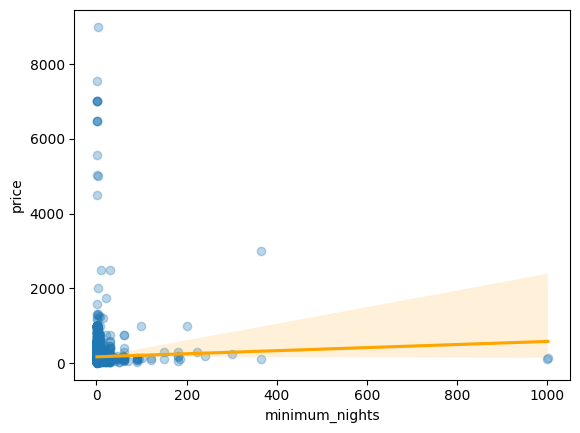

In [ ]:
sns.regplot(x='minimum_nights',y='price',data=df_train,
            scatter_kws={'alpha':0.3},line_kws={'color':'orange'})

In [ ]:
#X=df_train.drop(columns=['price','last_review','id','host_id'],axis=1)
X=df_train.drop(columns=['price','last_review'],axis=1)# just check feature selection
y=df_train['price']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=2)

In [ ]:
! pip uninstall xgboost

! pip install xgboost==0.90

Found existing installation: xgboost 1.7.6
Uninstalling xgboost-1.7.6:
  Would remove:
    /usr/local/lib/python3.10/dist-packages/xgboost-1.7.6.dist-info/*
    /usr/local/lib/python3.10/dist-packages/xgboost.libs/libgomp-a34b3233.so.1.0.0
    /usr/local/lib/python3.10/dist-packages/xgboost/*
Proceed (Y/n)? Y
  Successfully uninstalled xgboost-1.7.6
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 142.8/142.8 MB 6.2 MB/s eta 0:00:00


Feature Selection

Feature Importances :  [0.05524519 0.05090429 0.05116195 0.05086941 0.         0.05278847
 0.05218531 0.0582587  0.18510424 0.05172244 0.05674894 0.05599936
 0.06575717 0.05871382 0.05090651 0.04918836 0.05444585]


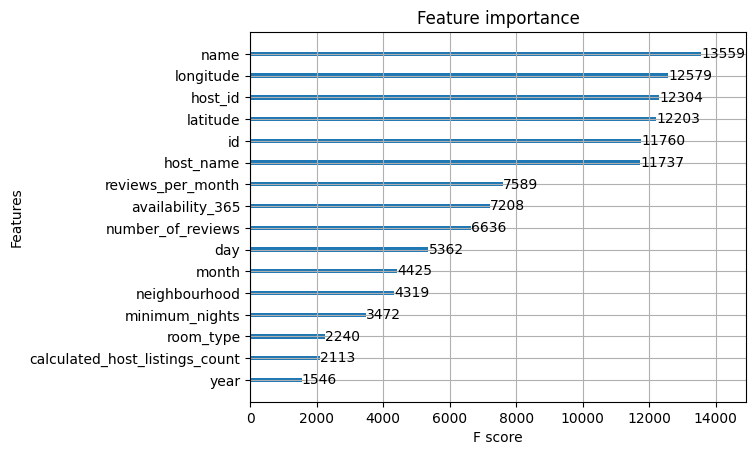

In [ ]:
from xgboost import XGBClassifier
from xgboost import plot_importance

# fit model to training data
xgb_model = XGBClassifier(random_state = 0 )
xgb_model.fit(X_train, y_train)

print("Feature Importances : ", xgb_model.feature_importances_)

# plot feature importance
plot_importance(xgb_model)
plt.show()

In [ ]:
from sklearn.feature_selection import SelectFromModel

In [ ]:
X_train = X_train.replace((np.inf, -np.inf, np.nan), 0).reset_index(drop=True)

In [ ]:
selection = SelectFromModel(xgb_model)
print(selection)
selection.fit(X_train, y_train)

# Transform the train and test features
select_X_train = selection.transform(X_train)

# train model
selection_model = XGBClassifier()
selection_model.fit(select_X_train, y_train)

SelectFromModel(estimator=XGBClassifier(objective='multi:softprob'))


XGBClassifier(objective='multi:softprob')

In [ ]:
select_X_train

array([[0., 1.],
       [2., 1.],
       [0., 1.],
       ...,
       [2., 3.],
       [2., 1.],
       [2., 3.]])

In [ ]:
y_train_pred=xgb_model.predict(X_train)
mse_train=mean_squared_error(y_train,y_train_pred)
rmse_train=math.sqrt(mse_train)
print(rmse_train)

127.6204132503254


In [ ]:
y_pred = xgb_model.predict(X_test)
mse_test=mean_squared_error(y_test,y_pred)
rmse_test=math.sqrt(mse_test)
print(rmse_test)

222.04946374692526


In [ ]:
predictions = selection_model.predict(select_X_train)

In [ ]:
mse_test1 = mean_squared_error(y_test,predictions)
rmse_test1 = math.sqrt(mse_test1)
print(rmse_test1)

ValueError: ignored

In [ ]:
lgbm =LGBMRegressor()

In [ ]:
lgbm =LGBMRegressor(random_state=4)
lgbm.fit(X_train,y_train)
bpred_train=lgbm.predict(X_train)
bpred=lgbm.predict(X_test)

In [ ]:
bmse_train=mean_squared_error(y_train,bpred_train)
brmse_train=math.sqrt(bmse_train)
print(brmse_train)

114.65801828043752


In [ ]:
bmse_test=mean_squared_error(y_test,bpred)
brmse_test=math.sqrt(bmse_test)
print(brmse_test)

220.28635168900416


In [ ]:
pip install lazypredict

In [ ]:
import lazypredict
from lazypredict.Supervised import LazyRegressor
from sklearn import datasets
from sklearn.utils import shuffle
reg = LazyRegressor(verbose=0,ignore_warnings=False, custom_metric=None )
models,predictions = reg.fit(X_train, X_test, y_train, y_test)

 71%|███████▏  | 30/42 [01:33<00:23,  1.94s/it]

In [ ]:
models,predictions

In [ ]:
from sklearn import ensemble
#model_LP = ensemble.ExtraTreesRegressor(n_estimators=5, max_depth=10, max_features=0.3, n_jobs=-1, random_state=0)
#model_LP = ensemble.ExtraTreesRegressor(n_estimators=100,max_depth=15,max_features=0.8,n_jobs=-2,random_state=0)--217.6253937376234
model_LP = ensemble.ExtraTreesRegressor(n_estimators=100,max_depth=15, n_jobs=-2, min_samples_split=2,min_samples_leaf=2, max_features=0.8,random_state=0)

In [ ]:
model_LP.fit(X_train,y_train)

In [ ]:
LP_pred_train=model_LP.predict(X_train)
LP_pred_test=model_LP.predict(X_test)

In [ ]:
LP_train=mean_squared_error(y_train,LP_pred_train)
MLP_train=math.sqrt(LP_train)
print(MLP_train)

In [ ]:
LP_test=mean_squared_error(y_test,LP_pred_test)
MLP_test=math.sqrt(LP_test)
print(MLP_test)

In [ ]:
scaler =StandardScaler()

In [ ]:
aboutdf(X)

In [ ]:
df_train['availability_365'].describe()

In [ ]:
X_scaler=scaler.fit_transform(X)

In [ ]:
X_scaler

In [ ]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=2)

In [ ]:
reg = linear_model.Ridge(alpha=.5)

In [ ]:
model=reg.fit(X_train,y_train)

In [ ]:
pred=model.predict(X_test)

In [ ]:
pred_train=model.predict(X_train)

In [ ]:
mse_train=mean_squared_error(y_train,pred_train)
rmse_train=math.sqrt(mse_train)
print(rmse_train)

In [ ]:
mse = mean_squared_error(y_test, pred)

rmse = math.sqrt(mse)
print(rmse)

Hyper parameter tunning

In [ ]:
from tqdm import tqdm
import math
from math import sqrt

In [ ]:
alpha = [1, 2, 3, 3.5, 4, 4.5, 5, 6, 7]
cv_rmsle_array=[]
for i in tqdm(alpha):
    model =linear_model.Ridge(solver="sag", random_state=42, alpha=i)
    model.fit(X_train, y_train)
    preds_cv = model.predict(X_test)
    mse=mean_squared_error(y_test, preds_cv)
    a=sqrt(mse)
    cv_rmsle_array.append(a)



for i in range(len(cv_rmsle_array)):
     print ('RMSLE for alpha = ',alpha[i],'is',cv_rmsle_array[i])

best_alpha = np.argmin(cv_rmsle_array)
fig, ax = plt.subplots()
ax.plot(alpha, cv_rmsle_array)
ax.scatter(alpha, cv_rmsle_array)
for i, txt in enumerate(np.round(cv_rmsle_array,3)):
    ax.annotate((alpha[i],np.round(txt,3)), (alpha[i],cv_rmsle_array[i]))
plt.title("Cross Validation Error for each alpha")
plt.xlabel("Alpha")
plt.ylabel("Error")
plt.show()

In [ ]:
print("Best alpha: ",  alpha[best_alpha])
model = linear_model.Ridge(solver="sag", random_state=42, alpha=alpha[best_alpha])
model.fit(X_train, y_train)
ridge_preds_tr = model.predict(X_train)
ridge_preds_cv = model.predict(X_test)
#ridge_preds_te = model.predict(X_test)
mse=mean_squared_error(y_train, ridge_preds_tr)
print('Train RMSLE:', sqrt(mse))
mse_test=mean_squared_error(y_test, ridge_preds_cv)
ridge_rmsle = sqrt((mse_test))
print("Cross validation RMSLE: ", ridge_rmsle)

In [ ]:
from scipy.stats import uniform
from scipy.stats import randint as sp_randint

In [ ]:
lgb_model = LGBMRegressor(subsample=0.9)

params = {'learning_rate': uniform(0, 1),
          'n_estimators': sp_randint(200, 1500),
          'num_leaves': sp_randint(20, 200),
          'max_depth': sp_randint(2, 15),
          'min_child_weight': uniform(0, 2),
          'colsample_bytree': uniform(0, 1),
         }
lgb_random = RandomizedSearchCV(lgb_model, param_distributions=params, n_iter=10, cv=3, random_state=42,
                                scoring='neg_root_mean_squared_error', verbose=10, return_train_score=True)
lgb_random = lgb_random.fit(X_train, y_train)

best_params = lgb_random.best_params_
print(best_params)

In [ ]:
model_lgbm = LGBMRegressor(**best_params, subsample=0.9, random_state=42, n_jobs=-1)
model_lgbm.fit(X_train, y_train)

lgb_preds_tr = model_lgbm.predict(X_train)
#lgb_preds_cv = model.predict(X_test)
lgb_preds_te = model_lgbm.predict(X_test)
mse_tr=mean_squared_error(y_train,lgb_preds_tr)
print("mse_tr:",mse_tr)
print('Train RMSLE:', sqrt(mse_tr))
mse_te=mean_squared_error(y_test,lgb_preds_te)
print(mse_te)
lgb_rmsle = sqrt(mse_te)
print("Test RMSLE: ", lgb_rmsle)

Lets compare the RMSE of the model used

In [ ]:
from prettytable import PrettyTable
x=PrettyTable()
x.field_names=["Model","methods","Train_RMSLE", "Test_RMSLE", "Kaggle_RMSLE(Public)"]
x.add_row(["Ridge","-id,host_id,+standardscalar","222.7798385525557","246.32535554500578","235.30133"])
x.add_row(["LightGBM","-id,host_id,+standardscalar","6.491644344317403","227.68104533754683","223.08112"])
x.add_row(["Ridge","+id,host_id,-standardscalar","222.24334838932626","245.89118907576744","-"])
x.add_row(["LightGBM","+id,host_id,-standardscalar","3.6579076181175987","224.6785629027711","217.04551"])
x.add_row(["XGB","+id,host_id,-standardscalar +fs","78.35747725276444","224.9775499003927","-"])
x.add_row(["LightGBM","+id,host_id,-standardscalar -fs","114.65801828043752","220.28635168900416","211.71734"])
x.add_row(["ExtraTreesRegressor","+id,host_id,-standardscalar -fs","0.010229915092057028","218.65119082233184","211.66401"])
x.add_row(["ExtraTreesRegressor","+id,host_id,-standardscalar-fs+tune","82.37541294218074","217.095978804005","211.24184"])
print(x)

lets check how our model perform with the test file . first we deal with data cleaning and data preprocessing

In [ ]:
aboutdf(df_validate)

First we will drop the neighourhood_group column as it has 100 percent null column

In [ ]:
df_validate=df_validate.drop(columns=['neighbourhood_group'],axis=1)

In [ ]:
df_validate['last_review']=pd.to_datetime(df_validate['last_review'])

In [ ]:
df_validate['name'].fillna(df_validate['name'].mode()[0], inplace=True)
df_validate['host_name'].fillna(df_validate['host_name'].mode()[0],inplace=True)
df_validate['last_review'].fillna(df_validate['last_review'].mean(),inplace=True)
df_validate['reviews_per_month'].fillna(df_validate['reviews_per_month'].mean(),inplace=True)

In [ ]:
df_validate["day"] = df_validate['last_review'].map(lambda x: x.day)
df_validate["month"] = df_validate['last_review'].map(lambda x: x.month)
df_validate["year"] = df_validate['last_review'].map(lambda x: x.year)

In [ ]:
df_validate=df_validate.drop(columns=['last_review'],axis=1)

Now cleaning is done ..next step is to preprocess it.

In [ ]:
df_validate['name']=LabelEncoder().fit_transform(df_validate['name'])
df_validate['host_name']=LabelEncoder().fit_transform(df_validate['host_name'])
df_validate['neighbourhood']=LabelEncoder().fit_transform(df_validate['neighbourhood'])
df_validate['room_type']=LabelEncoder().fit_transform(df_validate['room_type'])

standarization and then applying to the model

In [ ]:
X_val=df_validate

In [ ]:
X_valscaler=scaler.fit_transform(X_val)
pred_val=model.predict(X_valscaler)

implementing the lgbm for the test data set

In [ ]:
pred_lgbm=model_lgbm.predict(X_val)

In [ ]:
select_X_val = selection.transform(X_val)

In [ ]:
pred_xgb=selection_model.predict(select_X_val)

In [ ]:
bpred_lgbm=lgbm.predict(X_val)

In [ ]:
pred_lp=model_LP.predict(X_val)

In [ ]:
output = pd.DataFrame({'Id': df_validate.id,
                      'Price': pred_lp})
output.to_csv('submission.csv', index=False)
output